# Broadcasting with `volkit.future`

This notebook shows how inputs broadcast across shapes in `price_euro_future`.

In [ ]:
import numpy as np
import pandas as pd
from volkit.future import price_euro_future

## Example 1: Option prices for various underlying values


In [17]:
F = np.array([90.0, 100.0, 110.0, 120.0, 130.0])
K = 100.0
T = 0.5
r = 0.02
sigma = 0.20
cp = 'call'

price = price_euro_future(F, K, T, r, sigma, cp)

df = pd.DataFrame({"F": F, "price": price})
df

,F,price
0,90.0,1.754815
1,100.0,5.581107
2,110.0,12.089743
3,120.0,20.514241
4,130.0,29.899208


# Example 2: Two column prices for both calls and puts

In [18]:
K = 100.0
T = 0.5
r = 0.02
sigma = 0.20

# Rows
F = np.array([90.0, 100.0, 110.0, 120.0, 130.0])

# Columns
cp = np.array(['call', 'put'])

price = price_euro_future(F[:, None], K, T, r, sigma, cp[None, :])

df = pd.DataFrame(index=F, columns=cp, data=price)
df


,call,put
90.0,1.754815,11.655313
100.0,5.581107,5.581107
110.0,12.089743,2.189244
120.0,20.514241,0.713244
130.0,29.899208,0.197713


## Example 3: Surface plot of the Delta of a call option


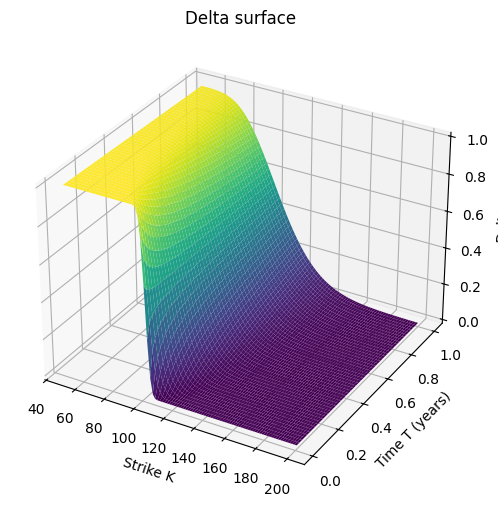

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from volkit.future import price_euro_future, delta_euro_future

F = 102.00
r = 0.02
sigma = 0.20
cp = "call"

# Grids
K = np.linspace(50.0, 200.0, 100)     # 100 strikes
T = np.linspace(0.01, 1.00, 50)       # 50 maturities (years)

# Delta surface: shape (len(K), len(T))
Delta = delta_euro_future(F, K[:, None], T[None, :], r, sigma, cp)

# Matching coordinate grids for plotting (same shape as Delta)
KK, TT = np.meshgrid(K, T, indexing="ij")

# Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(KK, TT, Delta, cmap="viridis", edgecolor="none", rstride=1, cstride=1)
ax.set_xlabel("Strike K")
ax.set_ylabel("Time T (years)")
ax.set_zlabel("Delta")
ax.set_title("Delta surface")
plt.show()
plt.close(fig)
